<a href="https://colab.research.google.com/github/fermarimoraes/sistemaderecomendacao/blob/main/Recomenda%C3%A7%C3%A3o_de_filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

In [5]:
filmes = pd.read_csv('movies.csv')
filmes.columns = ['filmeId', ' títulos', 'generos']
filmes = filmes.set_index('filmeId')
filmes.head()

,títulos,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [6]:
notas = pd.read_csv('ratings.csv')
notas.columns = ['usuarioId', 'filmeId', 'notas', 'momento']
notas.head()

,usuarioId,filmeId,notas,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
notas.describe()

,usuarioId,filmeId,notas,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


#Primeira tentativa de recomendação: Heurística de total de votos.


In [8]:
total_de_votos = notas['filmeId'].value_counts()
total_de_votos.head()

filmeId
356     329
318     317
296     307
593     279
2571    278
Name: count, dtype: int64

In [9]:
filmes['total_de_votos'] = total_de_votos
filmes.head()

,títulos,generos,total_de_votos
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,110.0
3,Grumpier Old Men (1995),Comedy|Romance,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
5,Father of the Bride Part II (1995),Comedy,49.0


In [10]:
filmes.loc[318]

 títulos          Shawshank Redemption, The (1994)
generos                                Crime|Drama
total_de_votos                               317.0
Name: 318, dtype: object

In [11]:
filmes.sort_values(by='total_de_votos', ascending=False).head()

,títulos,generos,total_de_votos
filmeId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0


In [12]:
notas_medias = notas.groupby('filmeId').mean()['notas']

In [13]:
filmes['notas_medias'] = notas_medias
filmes.sort_values(by='total_de_votos', ascending=False).head(10)

,títulos,generos,total_de_votos,notas_medias
filmeId,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0,4.231076
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0,3.750000
110,Braveheart (1995),Action|Drama|War,237.0,4.031646
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0,3.970982


#Segunda Heurística: Nota média e filtrando votos

In [14]:
filmes.sort_values(by='notas_medias', ascending=False).head(10)

,títulos,generos,total_de_votos,notas_medias
filmeId,,,,
88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,1.0,5.0
100556,"Act of Killing, The (2012)",Documentary,1.0,5.0
143031,Jump In! (2007),Comedy|Drama|Romance,1.0,5.0
143511,Human (2015),Documentary,1.0,5.0
143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,1.0,5.0
6201,Lady Jane (1986),Drama|Romance,1.0,5.0
102217,Bill Hicks: Revelations (1993),Comedy,1.0,5.0
102084,Justice League: Doom (2012),Action|Animation|Fantasy,1.0,5.0
6192,Open Hearts (Elsker dig for evigt) (2002),Romance,1.0,5.0


In [15]:
filmes.query('total_de_votos >= 10').sort_values(by='notas_medias', ascending=False).head(10)

,títulos,generos,total_de_votos,notas_medias
filmeId,,,,
1041,Secrets & Lies (1996),Drama,11.0,4.590909
3451,Guess Who's Coming to Dinner (1967),Drama,11.0,4.545455
1178,Paths of Glory (1957),Drama|War,12.0,4.541667
1104,"Streetcar Named Desire, A (1951)",Drama,20.0,4.475000
2360,"Celebration, The (Festen) (1998)",Drama,12.0,4.458333
1217,Ran (1985),Drama|War,15.0,4.433333
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
951,His Girl Friday (1940),Comedy|Romance,14.0,4.392857
1927,All Quiet on the Western Front (1930),Action|Drama|War,10.0,4.350000


In [16]:
filmes_com_mais_de_50_votos = filmes.query('total_de_votos >= 50')
filmes_com_mais_de_50_votos.sort_values(by='notas_medias', ascending=False).head(10)

,títulos,generos,total_de_votos,notas_medias
filmeId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
904,Rear Window (1954),Mystery|Thriller,84.0,4.261905
1221,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
48516,"Departed, The (2006)",Crime|Drama|Thriller,107.0,4.252336
1213,Goodfellas (1990),Crime|Drama,126.0,4.250000


In [17]:
eu_assisti = [1,4886,3114,10,53121,7,2]
filmes.loc[eu_assisti]

,títulos,generos,total_de_votos,notas_medias
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
4886,"Monsters, Inc. (2001)",Adventure|Animation|Children|Comedy|Fantasy,132.0,3.871212
3114,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy,97.0,3.860825
10,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.496212
53121,Shrek the Third (2007),Adventure|Animation|Children|Comedy|Fantasy,21.0,3.023810
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818


In [18]:
aventura_intantil = filmes_com_mais_de_50_votos.query("generos =='Adventure|Animation|Children|Comedy|Fantasy'").head(10)
aventura_intantil.drop(eu_assisti, errors='ignore').sort_values(by='notas_medias', ascending=False).head(10)


,títulos,generos,total_de_votos,notas_medias
filmeId,,,,


#Distância entre usuários

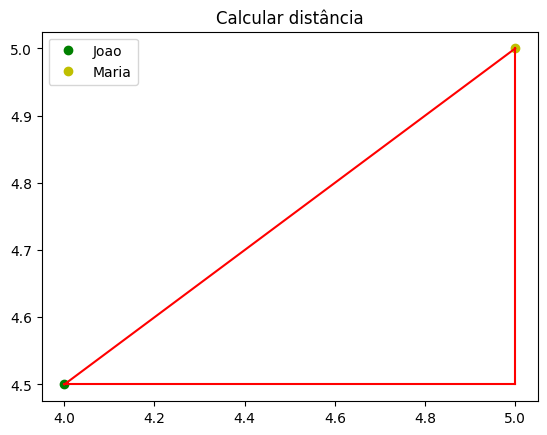

In [19]:
import matplotlib.pyplot as plt
plt.plot(4, 4.5, 'go')
plt.plot(5, 5, 'yo')
plt.legend(['Joao', 'Maria'])
plt.title('Calcular distância')
plt.plot([4,5],[4.5, 4.5], linestyle="-", color='r')
plt.plot([4,5],[4.5,5], linestyle="-", color='r')
plt.plot([5,5],[4.5,5], linestyle="-", color='r')





In [101]:
import numpy as np

joao = np.array([4, 4.5])
maria = np.array([5, 5])

joao - maria

array([-1. , -0.5])

In [150]:
from math import sqrt

def pitagoras(a,b):
  (delta_x, delta_y) = a - b
  return sqrt(delta_x * delta_x + delta_y * delta_y)

pitagoras(joao, maria)

1.118033988749895

In [141]:
np.linalg.norm(joao - maria)

1.118033988749895

In [23]:
filmes.head()

,títulos,generos,total_de_votos,notas_medias
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0,2.357143
5,Father of the Bride Part II (1995),Comedy,49.0,3.071429


In [124]:
notas

,usuarioId,filmeId,notas,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [203]:
def notas_do_usuario(usuario):
  notas_usuarios = notas.query('usuarioId==%d' % usuario)
  notas_usuarios = notas_usuarios[['filmeId', 'notas']].set_index('filmeId')
  return notas_usuarios

In [204]:
notas_do_usuario(4).head()

,notas
filmeId,
21,3.0
32,2.0
45,3.0
47,2.0
52,3.0


In [132]:
usuario1 = notas_do_usuario(1)
usuario50 = notas_do_usuario(4)
usuario1.head()
usuario50.head()

,notas
filmeId,
21,3.0
32,2.0
45,3.0
47,2.0
52,3.0


In [178]:
def distancia_de_vetores(a, b):
  return np.linalg.norm(a-b)

In [184]:
diferencas = usuario1.join(usuario50, lsuffix='_esquerdo', rsuffix='_direito').dropna()
diferencas


,notas_esquerdo,notas_direito
filmeId,,
47,5.0,2.0
235,4.0,2.0
260,5.0,5.0
296,3.0,1.0
441,4.0,1.0
457,5.0,5.0
553,5.0,2.0
593,4.0,5.0
608,5.0,5.0


In [185]:
distancia_de_vetores(diferencas['notas_esquerdo'], diferencas['notas_direito'])

11.135528725660043

In [209]:
def distancia_do_usuario(usuarioId1, usuarioId2):
  notas1 = notas_do_usuario(usuarioId1)
  notas2 = notas_do_usuario(usuarioId2)
  diferencas = notas1.join(notas2, lsuffix='_esquerdo', rsuffix='_direito').dropna()
  distancia = distancia_de_vetores(diferencas['notas_esquerdo'], diferencas['notas_direito'])
  return(usuarioId1, usuarioId2, distancia)

In [210]:
distancia_do_usuario(1,50)

(1, 50, 7.33143914930759)

In [139]:
distancia_de_vetores(diferencas['notas_esquerdo'], diferencas['notas_direito'])

11.135528725660043

In [163]:
quantidade_usuario = len(notas['usuarioId'].unique())

In [220]:

def distancia_de_todos(id_usuario):
  distancia =[]
  for usuario in notas['usuarioId'].unique():
    informacao = distancia_do_usuario(id_usuario, usuario)
    distancia.append(informacao)
    distacia = pd.DataFrame(distancia, columns = ['voce', 'outra_pessoa', 'distancia'])
  return distancia


distancia_de_todos(1)[:5]


[(1, 1, 0.0),
 (1, 2, 1.4142135623730951),
 (1, 3, 8.200609733428363),
 (1, 4, 11.135528725660043),
 (1, 5, 3.7416573867739413)]